# Лабораторная работа №2. Жесткие системы ОДУ.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
y_0 = np.array([0.0, 0.001])

def f(y):
    e = 1000
    
    x = y[0]
    z = y[1]
    res = np.array([z, e * (1 - z**2) * z - x])

    return res

def J_f(y):
    e = 1000

    x = y[0]
    z = y[1]

    res = np.zeros((2, 2))

    res[0] = [0, 1]
    res[1] = [ - 1, e * z - 3 * e * z**2]

    return res

Dim = 2
max_t = 300.0
N = 6000
h = max_t / N

In [3]:
def is_zero (num):
    if(np.abs(num) < epsilon):
        return 0.0
    else:
        return num

def vec_norm (v, n):
    res = 0.0
    for i in range(n):
        res = res + v[i] ** 2
    res = res ** (0.5)
    return res

def matrix_dot (A, x, n):
    res = np.zeros(n)
    for i in range(n):
        for j in range(n):
            res[i] += A[i][j] * x[j]

    return res

def skalar_dot (a, b, n):
    res = 0.0
    for i in range(n):
        res += a[i] * b[i]

    return res

def tr (A, n):
    res = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            res[i][j] = A[j][i]

    return res

def matrix_x_matrix (A, B, n):
    res = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            for k in range(n):
                res[i][j] += A[i][k] * B[k][j]

    return res

In [4]:
def Zeid_sum_prev (A, x, n, i):
    res = 0.0
    for j in range(i + 1, n):
        res = res + A[i][j] * x[j]

    return res

def Zeid_sum_next (A, x, i):
    res = 0.0
    for j in range(i):
        res = res + A[i][j] * x[j]

    return res

def Zeidel_method (n, A, b):
    tr_A = tr (A, n)
    A = matrix_x_matrix (tr_A, A, n)
    b = matrix_dot(tr_A, b, n)
    
    epsilon = 0.001
    resid_zeid = 1.0
    x_prev_zeid = np.ones (n)
    x_next_zeid = np.zeros(n)

    cnt_zeid = 0
    
    while (cnt_zeid < 6 or True) and (resid_zeid > epsilon):
        for i in range(n):
            x_next_zeid[i] = (b[i] - Zeid_sum_next(A, x_next_zeid, i) - Zeid_sum_prev(A, x_prev_zeid, n, i)) / A[i][i]

        x_prev_zeid = x_next_zeid
        resid_zeid  = vec_norm(matrix_dot(A, x_next_zeid, n) - b, n)
        cnt_zeid += 1

    #print("Zeid cnt = ", cnt_zeid)
    #print("resid = ", resid_zeid)
    return x_next_zeid

In [5]:
def SNE_J (n, a, b, J_func, y):
    E = np.zeros((n, n))
    for i in range(n):
        E[i][i] = 1.0
        
    return b * J_func(y) - a * E

def SNE_check_solution (n, a, b, c, f, y):
    resid = 0.0

    res = SNE_F(a, b, c, f, y)
    resid = vec_norm(res, n)

    return resid    
    
def SNE_F (a, b, c, f, y):
    return b * f(y) - a * y + c

# Newton method for system of nonlinear equastions (SNE): ay = bf(y + const) + c
def SNE_solution (n, a, b, c, f, J_func, y_0):
    epsilon = 0.001
    
    y_prev = y_0
    y_next = np.zeros(n)

    cnt = 0
    while (cnt < 5 or True) and (SNE_check_solution (n, a, b, c, f, y_prev) > epsilon):
        y_next = y_prev + Zeidel_method(n, SNE_J(n, a, b, J_func, y_prev), - SNE_F(a, b, c, f, y_prev))

        y_prev = y_next
        cnt += 1
    return y_next


/tmp/ipykernel_3253/1124089630.py:8: RuntimeWarning: overflow encountered in scalar multiply
  res = np.array([z, e * (1 - z**2) * z - x])
/tmp/ipykernel_3253/517152815.py:24: RuntimeWarning: invalid value encountered in add
  y_n[i + 1] = y_n[i] + (h / 24) * (55 * f(y_n[i]) - 59 * f(y_n[i - 1]) + 37 * f(y_n[i - 2]) - 9 * f(y_n[i - 3]))


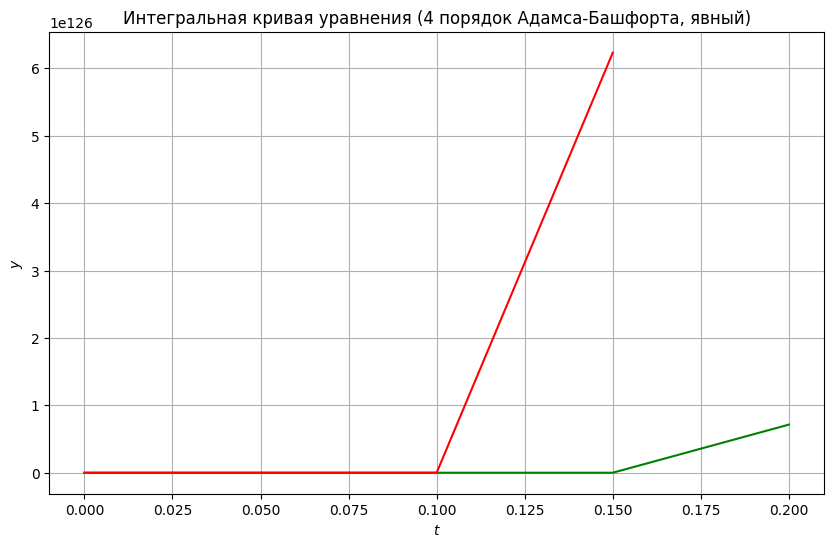

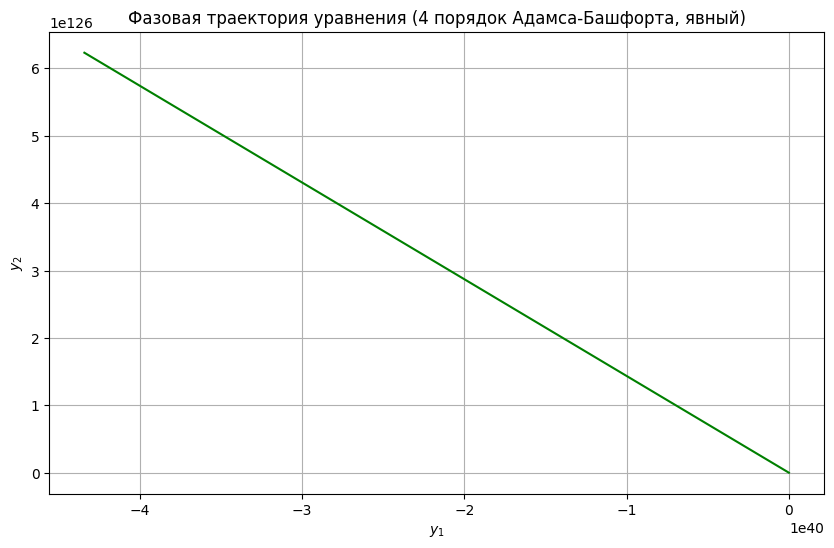

In [6]:
y_n = np.zeros((N + 1, Dim))
y_n[0] = y_0

x_n = np.zeros(N + 1)
x_n[0] = y_0[0]

t_n = np.zeros(N + 1)
t_n[0] = 0.0

res = np.zeros(N + 1)
res[0] = y_0[1]

# first step (Euler method):
y_n[1] = y_n[0] + h * f(y_n[0])

# second step (Adams-2 method):
y_n[2] = y_n[1] + (h / 2) * (3 * f(y_n[1]) - f(y_n[0]))

# third step (Adams-3 method):
y_n[3] = y_n[1] + (h / 12) * (23 * f(y_n[2]) - 16 * f(y_n[1]) + 5 * f(y_n[0]))


for i in range(3, N):
    y_n[i + 1] = y_n[i] + (h / 24) * (55 * f(y_n[i]) - 59 * f(y_n[i - 1]) + 37 * f(y_n[i - 2]) - 9 * f(y_n[i - 3]))
    x_n[i + 1] = y_n[i + 1][0]
    res[i + 1] = y_n[i + 1][1]

    t_n[i + 1] = t_n[i] + h

fig = plt.figure(figsize=(10, 6))
plot = fig.add_subplot()
plt.plot(t_n, x_n, color='green' )
plt.plot(t_n, res, color='red' )
plt.title('Интегральная кривая уравнения (4 порядок Адамса-Башфорта, явный)')
plt.xlabel('$t$')
plt.ylabel('$y$')
#plot.set(xlim=(3, 3.5), ylim=(-50000, 50000))
plt.grid()
plt.show()

fig = plt.figure(figsize=(10, 6))
plot = fig.add_subplot()
plt.plot(x_n, res, color='green' )
plt.title('Фазовая траектория уравнения (4 порядок Адамса-Башфорта, явный)')
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.grid()
plt.show()

In [7]:
y_n = y_0

x_n = np.zeros(N + 1)

res = np.zeros((N + 1, Dim))
res[0] = y_0

res_1 = np.zeros((2, N + 1))
res_1[0][0] = res[0][0]
#res_1[1][0] = res[0][2]

res_2 = np.zeros((2, N + 1))
res_2[0][0] = res[0][1]
#res_2[1][0] = res[0][3]

# first step (Euler method, implicit):
y_n = SNE_solution(Dim, 1, 1, y_n, f, J_f, y_n + h * f(y_n))
x_n[1] = x_n[0] + h
res[1] = y_n

res_1[0][1] = res[1][0]
res_2[0][1] = res[1][1]
#res_1[1][1] = res[1][2]
#res_2[1][1] = res[1][3]
#----------------------------

# second step (BDF-2 method, implicit):
y_n_1 = res[0]
    
y_n = SNE_solution(Dim, 3 / 2, 1, 2 * y_n - (1 / 2) * y_n_1, f, J_f, y_n_1 + 2 * h * f(y_n))
x_n[2] = x_n[1] + h
res[2] = y_n

res_1[0][2] = res[2][0]
res_2[0][2] = res[2][1]
#res_1[1][2] = res[2][2]
#res_2[1][2] = res[2][3]
#----------------------------

# BDF-3 method (implicit):
for i in range(2, N):
    y_n_1 = res[i - 1]
    y_n_2 = res[i - 2]
    
    y_n = SNE_solution(Dim, 11 / 6, 1, 3 * y_n - (3 / 2) * y_n_1 + (1 / 3) * y_n_2, f, J_f, y_n_1 + 2 * h * f(y_n))
    
    x_n[i + 1] = x_n[i] + h
    res[i + 1] = y_n

    res_1[0][i + 1] = res[i + 1][0]
    res_2[0][i + 1] = res[i + 1][1]
    #res_1[1][i + 1] = res[i + 1][2]
    #res_2[1][i + 1] = res[i + 1][3]


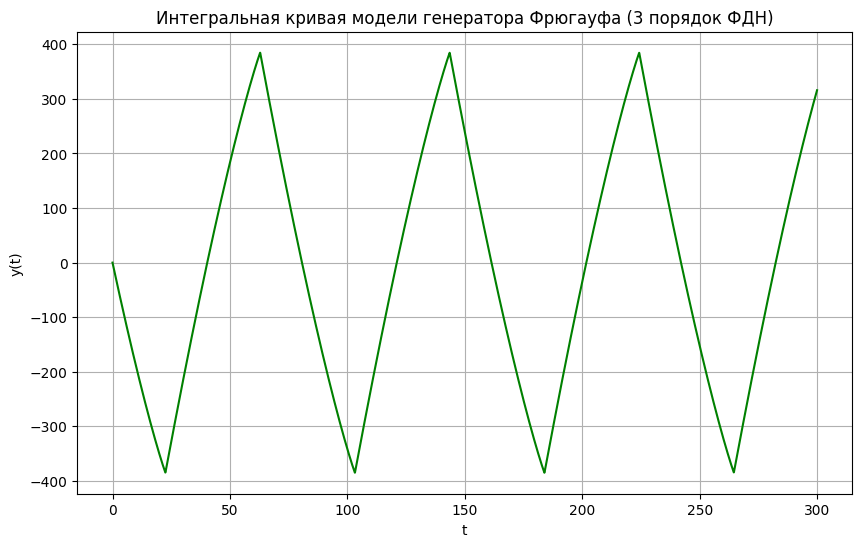

In [8]:
fig = plt.figure(figsize=(10, 6))
plot = fig.add_subplot()
plt.plot(x_n, res_1[0], color='green' )
plt.title('Интегральная кривая модели генератора Фрюгауфа (3 порядок ФДН)')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid()
plt.show()

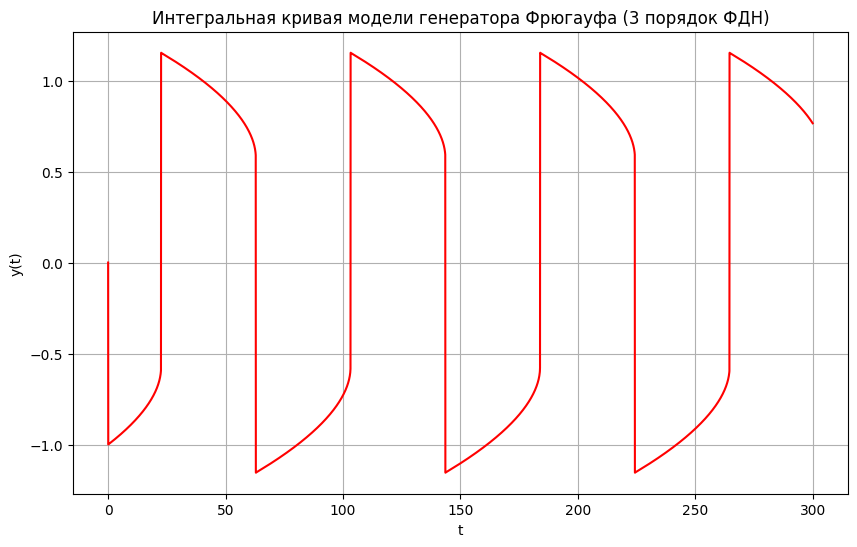

In [9]:
fig = plt.figure(figsize=(10, 6))
plot = fig.add_subplot()
plt.plot(x_n, res_2[0], color='red' )
plt.title('Интегральная кривая модели генератора Фрюгауфа (3 порядок ФДН)')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid()
plt.show()

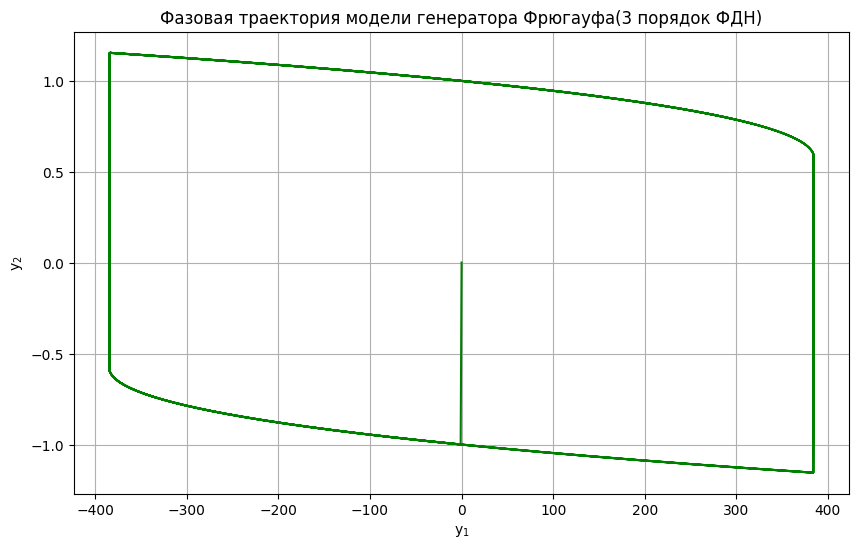

In [10]:
fig = plt.figure(figsize=(10, 6))
plot = fig.add_subplot()
plt.plot(res_1[0], res_2[0], color='green' )
plt.title('Фазовая траектория модели генератора Фрюгауфа(3 порядок ФДН)')
plt.xlabel('y$_1$')
plt.ylabel('y$_2$')
#plot.set(xlim=(-1000, 1000), ylim=(-1000, 1000))
plt.grid()
plt.show()

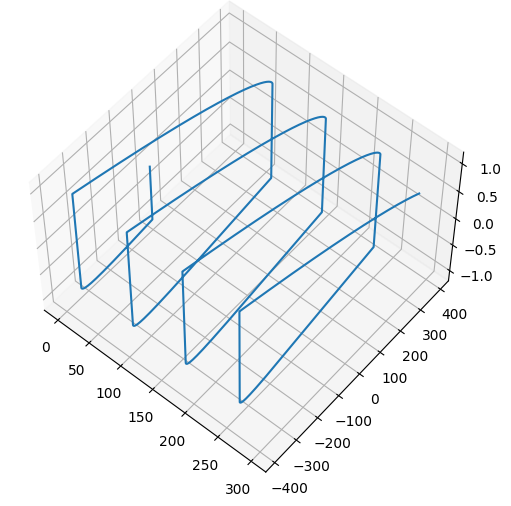

In [11]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
ax.plot(x_n, res_1[0], res_2[0], label='parametric curve')
#ax.set(xlim=(0.125, 0.15), ylim=(-50000, 50000), zlim=(-50000, 50000))
ax.view_init(elev=55, azim=-50)
plt.show()

In [12]:
y_n = y_0

x_n = np.zeros(N + 1)

res = np.zeros((N + 1, Dim))
res[0] = y_0

res_1 = np.zeros((2, N + 1))
res_1[0][0] = res[0][0]
#res_1[1][0] = res[0][2]

res_2 = np.zeros((2, N + 1))
res_2[0][0] = res[0][1]
#res_2[1][0] = res[0][3]

# first step (Euler method, implicit):
y_n = SNE_solution(Dim, 1, 1, y_n, f, J_f, y_n + h * f(y_n))
x_n[1] = x_n[0] + h
res[1] = y_n

res_1[0][1] = res[1][0]
res_2[0][1] = res[1][1]
#res_1[1][1] = res[1][2]
#res_2[1][1] = res[1][3]
#----------------------------

# second step (BDF-2 method, implicit):
y_n_1 = res[0]
    
y_n = SNE_solution(Dim, 3 / 2, 1, 2 * y_n - (1 / 2) * y_n_1, f, J_f, y_n_1 + 2 * h * f(y_n))
x_n[2] = x_n[1] + h
res[2] = y_n

res_1[0][2] = res[2][0]
res_2[0][2] = res[2][1]
#res_1[1][2] = res[2][2]
#res_2[1][2] = res[2][3]
#----------------------------

# third step (BDF-3 method, implicit):
y_n_1 = res[1]
y_n_2 = res[0]
    
y_n = SNE_solution(Dim, 11 / 6, 1, 3 * y_n - (3 / 2) * y_n_1 + (1 / 3) * y_n_2, f, J_f, y_n_1 + 2 * h * f(y_n))
x_n[3] = x_n[2] + h
res[3] = y_n

res_1[0][3] = res[3][0]
res_2[0][3] = res[3][1]
#res_1[1][3] = res[3][2]
#res_2[1][3] = res[3][3]
#----------------------------

# BDF-4 method (implicit):
for i in range(3, N):
    y_n_1 = res[i - 1]
    y_n_2 = res[i - 2]
    y_n_3 = res[i - 3]
    
    y_n = SNE_solution(Dim, 25 / 12, 1, 4 * y_n - 3 * y_n_1 + (4 / 3) * y_n_2 - (1 / 4) * y_n_3, f, J_f, y_n_1 + 2 * h * f(y_n))
    
    x_n[i + 1] = x_n[i] + h
    res[i + 1] = y_n

    res_1[0][i + 1] = res[i + 1][0]
    res_2[0][i + 1] = res[i + 1][1]
    #res_1[1][i + 1] = res[i + 1][2]
    #res_2[1][i + 1] = res[i + 1][3]

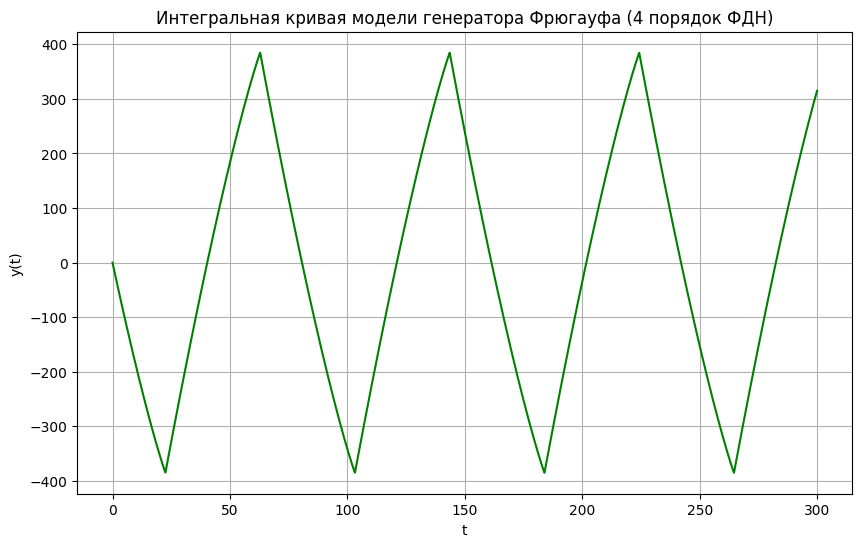

In [13]:
fig = plt.figure(figsize=(10, 6))
plot = fig.add_subplot()
plt.plot(x_n, res_1[0], color='green' )
plt.title('Интегральная кривая модели генератора Фрюгауфа (4 порядок ФДН)')
plt.xlabel('t')
plt.ylabel('y(t)')
#plot.set(xlim=(0.125, 0.15), ylim=(-50000, 50000))
plt.grid()
plt.show()

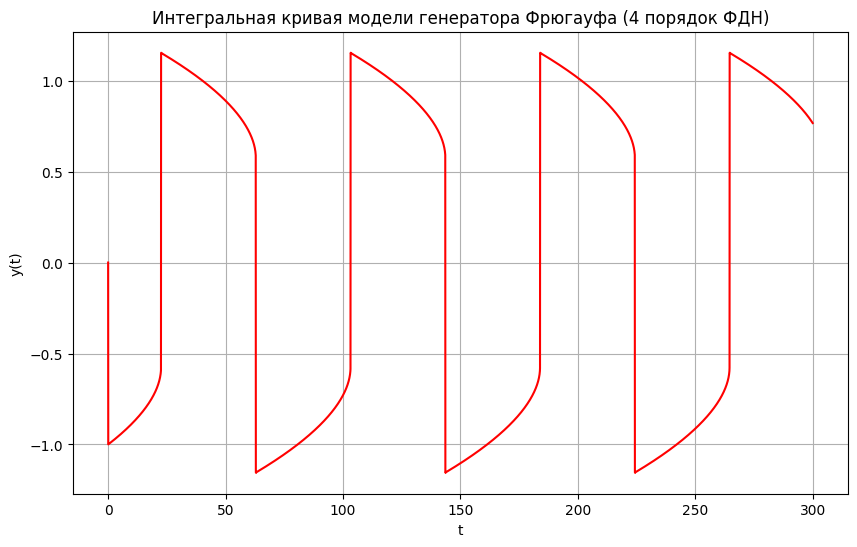

In [14]:
fig = plt.figure(figsize=(10, 6))
plot = fig.add_subplot()
plt.plot(x_n, res_2[0], color='red' )
plt.title('Интегральная кривая модели генератора Фрюгауфа (4 порядок ФДН)')
plt.xlabel('t')
plt.ylabel('y(t)')
#plot.set(xlim=(0.125, 0.15), ylim=(-50000, 50000))
plt.grid()
plt.show()

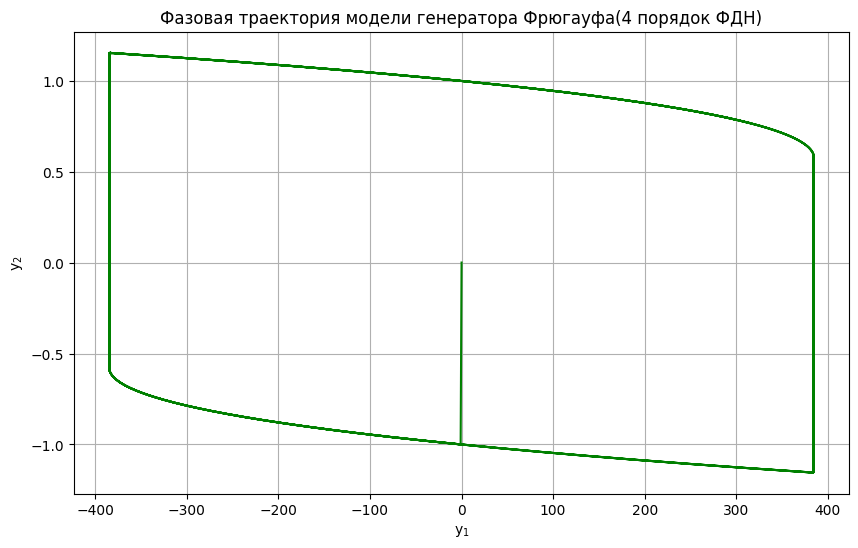

In [15]:
fig = plt.figure(figsize=(10, 6))
plot = fig.add_subplot()
plt.plot(res_1[0], res_2[0], color='green' )
plt.title('Фазовая траектория модели генератора Фрюгауфа(4 порядок ФДН)')
plt.xlabel('y$_1$')
plt.ylabel('y$_2$')
#plot.set(xlim=(-1000, 1000), ylim=(-1000, 1000))
plt.grid()
plt.show()

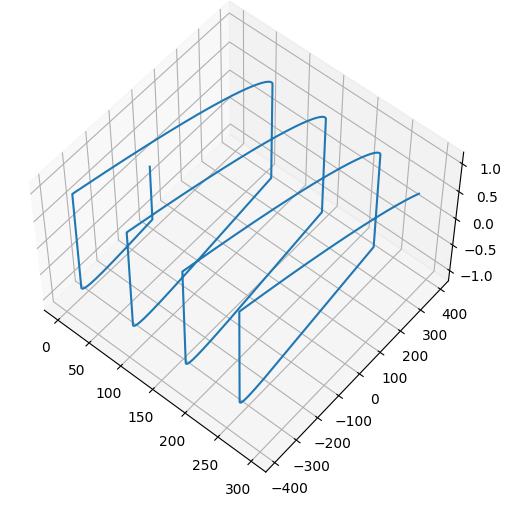

In [16]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
ax.plot(x_n, res_1[0], res_2[0], label='parametric curve')
#ax.set(xlim=(0.125, 0.15), ylim=(-50000, 50000), zlim=(-50000, 50000))
ax.view_init(elev=55, azim=-50)
plt.show()

In [17]:
y_n = y_0

x_n = np.zeros(N + 1)

res = np.zeros((N + 1, Dim))
res[0] = y_0

res_1 = np.zeros((2, N + 1))
res_1[0][0] = res[0][0]
#res_1[1][0] = res[0][2]

res_2 = np.zeros((2, N + 1))
res_2[0][0] = res[0][1]
#res_2[1][0] = res[0][3]

# first step (Euler method, implicit):
y_n = SNE_solution(Dim, 1, 1, y_n, f, J_f, y_n + h * f(y_n))
x_n[1] = x_n[0] + h
res[1] = y_n

res_1[0][1] = res[1][0]
res_2[0][1] = res[1][1]
#res_1[1][1] = res[1][2]
#res_2[1][1] = res[1][3]
#----------------------------

# second step (BDF-2 method, implicit):
y_n_1 = res[0]
    
y_n = SNE_solution(Dim, 3 / 2, 1, 2 * y_n - (1 / 2) * y_n_1, f, J_f, y_n_1 + 2 * h * f(y_n))
x_n[2] = x_n[1] + h
res[2] = y_n

res_1[0][2] = res[2][0]
res_2[0][2] = res[2][1]
#res_1[1][2] = res[2][2]
#res_2[1][2] = res[2][3]
#----------------------------

# third step (BDF-3 method, implicit):
y_n_1 = res[1]
y_n_2 = res[0]
    
y_n = SNE_solution(Dim, 11 / 6, 1, 3 * y_n - (3 / 2) * y_n_1 + (1 / 3) * y_n_2, f, J_f, y_n_1 + 2 * h * f(y_n))
x_n[3] = x_n[2] + h
res[3] = y_n

res_1[0][3] = res[3][0]
res_2[0][3] = res[3][1]
#res_1[1][3] = res[3][2]
#res_2[1][3] = res[3][3]
#----------------------------

# fourth step (BDF-4 method, implicit):
y_n_1 = res[2]
y_n_2 = res[1]
y_n_2 = res[0]
    
y_n = SNE_solution(Dim, 25 / 12, 1, 4 * y_n - 3 * y_n_1 + (4 / 3) * y_n_2 - (1 / 4) * y_n_3, f, J_f, y_n_1 + 2 * h * f(y_n))
x_n[4] = x_n[3] + h
res[4] = y_n

res_1[0][4] = res[4][0]
res_2[0][4] = res[4][1]
#res_1[1][4] = res[4][2]
#res_2[1][4] = res[4][3]
#----------------------------

# BDF-5 method (implicit):
for i in range(3, N):
    y_n_1 = res[i - 1]
    y_n_2 = res[i - 2]
    y_n_3 = res[i - 3]
    y_n_4 = res[i - 4]
    
    y_n = SNE_solution(Dim, 137 / 60, 1, 5 * y_n - 5 * y_n_1 + (10 / 3) * y_n_2 - (5 / 4) * y_n_3 + (1 / 5) * y_n_4, f, J_f, y_n_1 + 2 * h * f(y_n))
    
    x_n[i + 1] = x_n[i] + h
    res[i + 1] = y_n

    res_1[0][i + 1] = res[i + 1][0]
    res_2[0][i + 1] = res[i + 1][1]
    #res_1[1][i + 1] = res[i + 1][2]
    #res_2[1][i + 1] = res[i + 1][3]

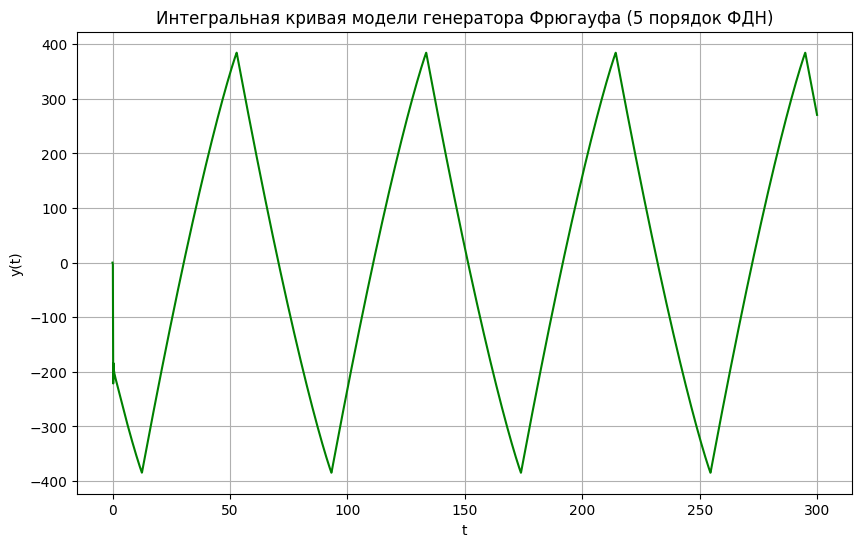

In [25]:
fig = plt.figure(figsize=(10, 6))
plot = fig.add_subplot()
plt.plot(x_n, res_1[0], color='green' )
plt.title('Интегральная кривая модели генератора Фрюгауфа (5 порядок ФДН)')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid()
plt.show()

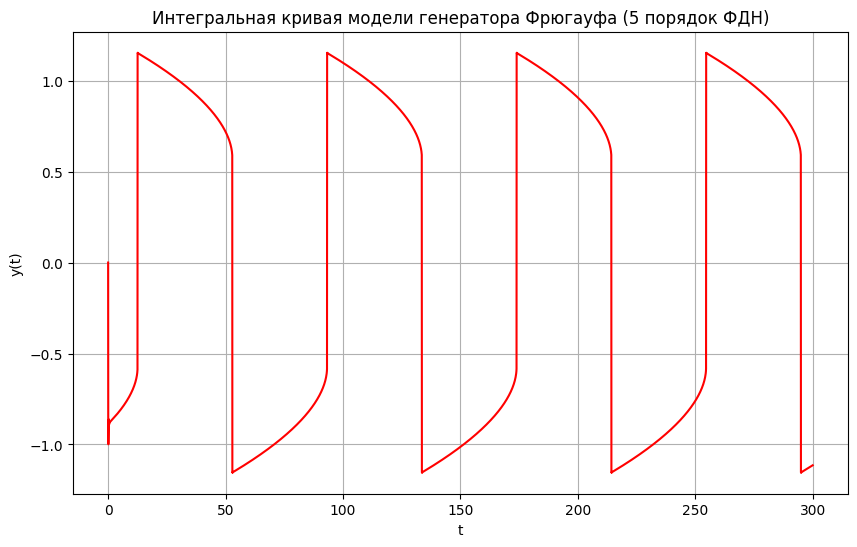

In [19]:
fig = plt.figure(figsize=(10, 6))
plot = fig.add_subplot()
plt.plot(x_n, res_2[0], color='red' )
plt.title('Интегральная кривая модели генератора Фрюгауфа (5 порядок ФДН)')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid()
plt.show()

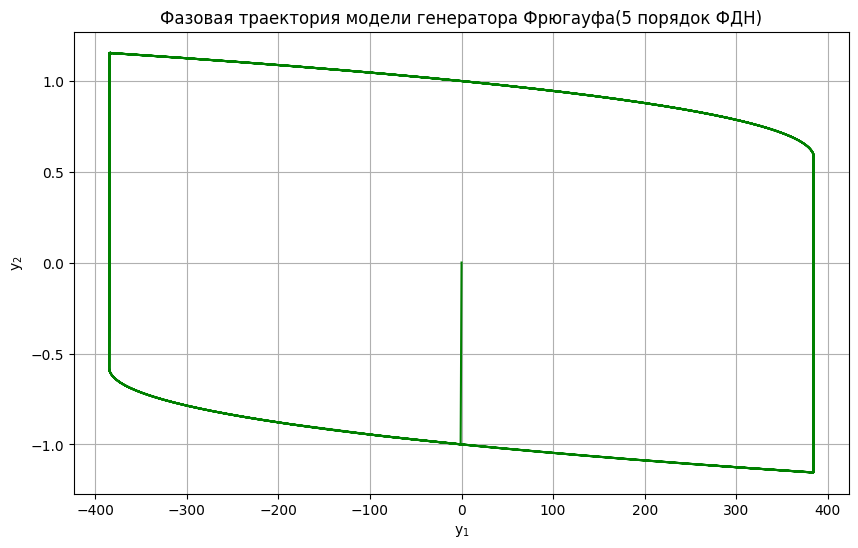

In [20]:
fig = plt.figure(figsize=(10, 6))
plot = fig.add_subplot()
plt.plot(res_1[0], res_2[0], color='green' )
plt.title('Фазовая траектория модели генератора Фрюгауфа(5 порядок ФДН)')
plt.xlabel('y$_1$')
plt.ylabel('y$_2$')
#plot.set(xlim=(-1000, 1000), ylim=(-1000, 1000))
plt.grid()
plt.show()

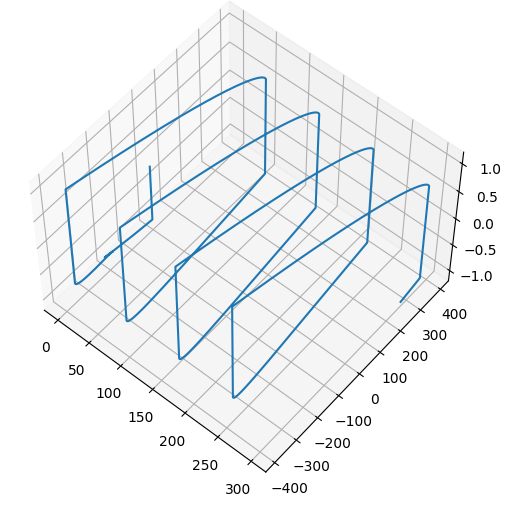

In [21]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
ax.plot(x_n, res_1[0], res_2[0], label='parametric curve')
#ax.set(xlim=(0.125, 0.15), ylim=(-50000, 50000), zlim=(-50000, 50000))
ax.view_init(elev=55, azim=-50)
plt.show()